# PROJECT TITLE: THE SE HIGHER EDUCATION BRAIN DRAIN

## SETUP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### IMPORT MAIN DATA SET -- STUDENT ENROLMENTS IN HIGHER EDUCATION 

In [2]:
raw_material= pd.read_csv(
   r'\Users\rhayes\Desktop\UCD_Data_Analytics_Course\HEA_Student_Enrolment_Data_Domiciliary_FT_Only_201819.csv'
)

In [3]:
# Clean the data 
raw_material=raw_material.drop_duplicates()
raw_material.head()
# Hold onto values under County as they are necessary for the overall calculation 

,Number of Students,Academic Year,Dom Ireland GB,Mode Desc,Isced Discipline,Institute New Combined,County
0,2,2018/2019,(Other) EU,Full-time,(0114) Teacher training with subject specializ...,"National University of Ireland, Galway",NaN
1,18,2018/2019,(Other) EU,Full-time,(0210) Arts not further defined or elsewhere c...,"National University of Ireland, Galway",NaN
2,1,2018/2019,(Other) EU,Full-time,(0211) Audio-visual techniques and media produ...,"National University of Ireland, Galway",NaN
3,1,2018/2019,(Other) EU,Full-time,"(0212) Fashion, interior and industrial design",Galway-Mayo IT,NaN
4,1,2018/2019,(Other) EU,Full-time,(0220) Humanities (except languages) not furth...,"National University of Ireland, Galway",NaN


## SECTION 1: 
## THE PROFILE OF HIGHER EDUCATION ENROLMENT IN IRELAND

## 1.1 What Colleges Have the Most Students? 

In [4]:
student_population_colleges = raw_material.groupby ( ["Institute New Combined"]) ["Number of Students"].agg(sum) 
student_population_colleges=student_population_colleges.reset_index()
student_population_colleges = student_population_colleges.sort_values("Number of Students", ascending=False)

In [5]:
# List the colleges by rank order, largest to smallest, and rename one of the columns 
student_population_colleges ["Rank"] = (np.arange(len (student_population_colleges)))+1
student_population_colleges=student_population_colleges.set_index ("Rank")
student_population_colleges=student_population_colleges.rename (columns={"Institute New Combined":"College"})

In [6]:
#Final list of colleges
student_population_colleges

,College,Number of Students
Rank,,
1,University College Dublin,22792
2,Technological University Dublin,18830
3,University College Cork,17721
4,Trinity College Dublin,15543
5,"National University of Ireland, Galway",15002
6,Dublin City University,13635
7,University of Limerick,13038
8,Maynooth University,10818
9,Cork IT,8315


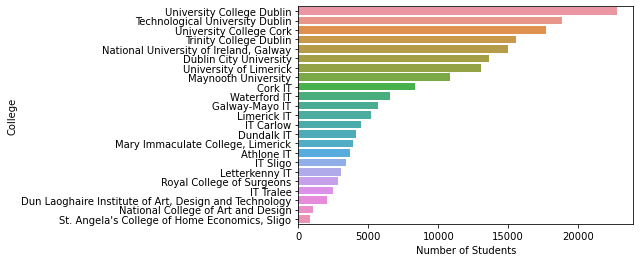

In [7]:
#Create graphic representation 
sns.barplot(data=student_population_colleges, y="College", x="Number of Students");

In [8]:
# It would also be interesting to get the overall percentage of the total number recruited by each institution 
student_population_colleges ["Percent of Overall"] = student_population_colleges ["Number of Students"]/student_population_colleges ["Number of Students"].sum()
student_population_colleges=student_population_colleges.round(decimals=4) 

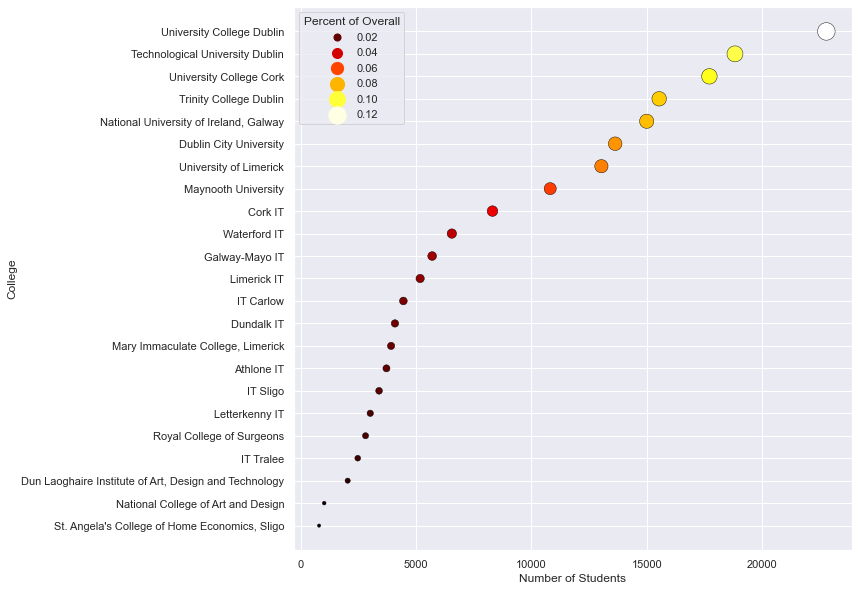

In [9]:
#This presented in graphic form
sns.set_style("ticks")
sns.set(rc={"figure.figsize":(10, 10)})
minsize=min(student_population_colleges["Percent of Overall"]*2500)
maxsize=max(student_population_colleges["Percent of Overall"]*2500)
sns.scatterplot(data=student_population_colleges
                , x="Number of Students", y="College"
                , edgecolor = "black"
                , palette="hot"
                , size="Percent of Overall"
                , sizes=(minsize, maxsize)
                , hue="Percent of Overall"
                );

In [10]:
# Final list for printing
student_population_colleges=student_population_colleges.round(decimals=2)    
student_population_colleges

,College,Number of Students,Percent of Overall
Rank,,,
1,University College Dublin,22792,0.12
2,Technological University Dublin,18830,0.10
3,University College Cork,17721,0.10
4,Trinity College Dublin,15543,0.08
5,"National University of Ireland, Galway",15002,0.08
6,Dublin City University,13635,0.07
7,University of Limerick,13038,0.07
8,Maynooth University,10818,0.06
9,Cork IT,8315,0.04


## 1.2 What it the Most Popular Discipline for Students? 

In [11]:
# Disciplines are listed according to ISCED, which is the international method for classifying academic activity
student_population_course = raw_material.groupby ( ["Isced Discipline"]) ["Number of Students"].agg(sum) 
student_population_course= student_population_course.reset_index()

In [12]:
student_population_course =student_population_course.sort_values("Number of Students", ascending=False)
student_population_course ["Rank"] = (np.arange(len (student_population_course)))+1
student_population_course=student_population_course.set_index ("Rank")
student_population_course=student_population_course.rename (columns={"Isced Discipline":"Course Area (Isced)"})
# Output top 20 course areas
student_population_course [0:20] 

,Course Area (Isced),Number of Students
Rank,,
1,(0410) Business and administration not further...,14668
2,(0210) Arts not further defined or elsewhere c...,11613
3,(0913) Nursing and midwifery,7998
4,(0912) Medicine,7984
5,(0413) Management and administration,7454
6,(0421) Law,5745
7,(0610) Information and Communication Technolog...,5480
8,(0510) Biological and related sciences not fur...,5134
9,(0613) Software and applications development a...,4570


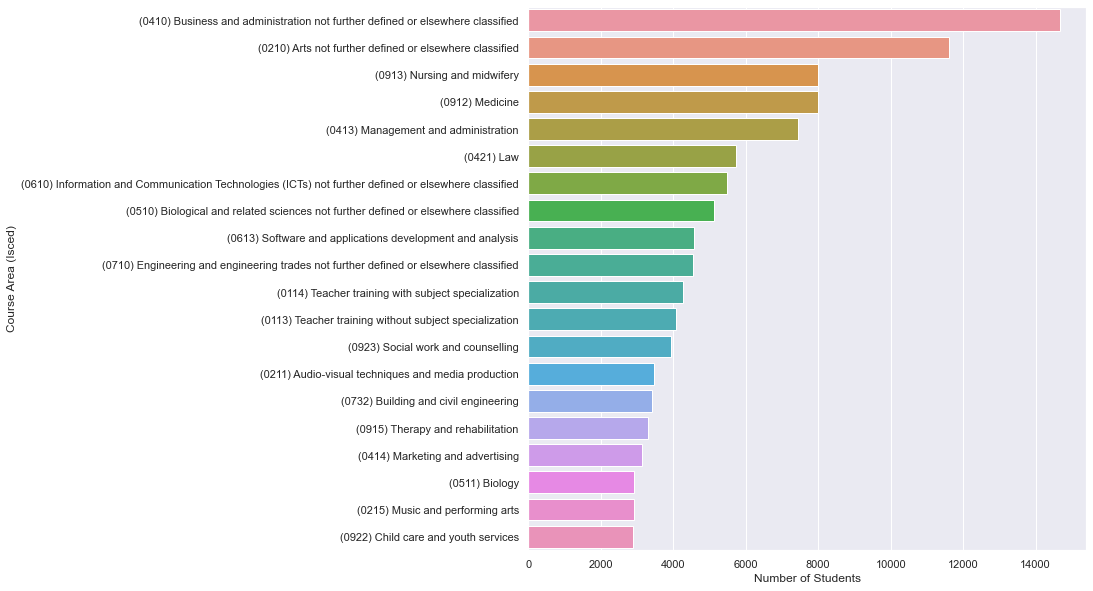

In [13]:
# Represent top 20 in graphic form
sns.barplot(data=student_population_course[0:20], y="Course Area (Isced)", x="Number of Students");

In [14]:
# Again it would be interesting to know what percentage of the overall each of these occupies
student_population_course ["Percent of Overall"] = student_population_course ["Number of Students"]/student_population_course ["Number of Students"].sum()
student_population_course=student_population_course.round(decimals=5) 
student_population_course [0:20]

,Course Area (Isced),Number of Students,Percent of Overall
Rank,,,
1,(0410) Business and administration not further...,14668,0.07936
2,(0210) Arts not further defined or elsewhere c...,11613,0.06283
3,(0913) Nursing and midwifery,7998,0.04327
4,(0912) Medicine,7984,0.04319
5,(0413) Management and administration,7454,0.04033
6,(0421) Law,5745,0.03108
7,(0610) Information and Communication Technolog...,5480,0.02965
8,(0510) Biological and related sciences not fur...,5134,0.02778
9,(0613) Software and applications development a...,4570,0.02472


In [15]:
# Create chart here maybe? 

# Shuffle the rows for the purposes of the graphic
student_population_course_shuffled=student_population_course[0:20].sample(frac=1) 


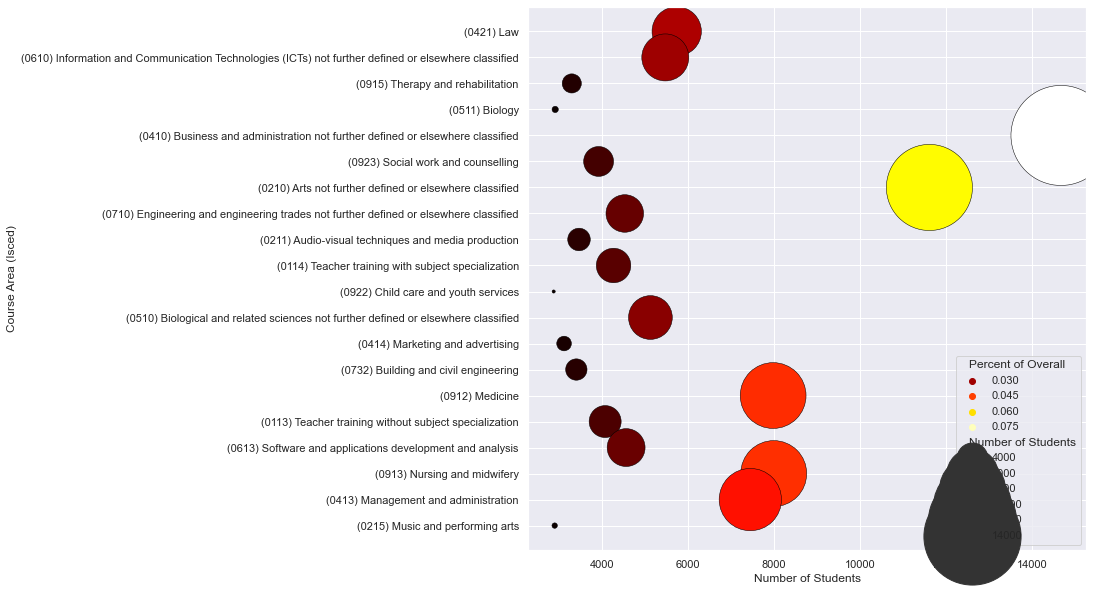

In [16]:
plot1=sns.scatterplot(data=student_population_course_shuffled
                , x="Number of Students"
                , y="Course Area (Isced)"
                , edgecolor = "black"
                , palette="hot"
                , size="Number of Students"
                , sizes=(10,10000)#(minsize, maxsize)
                , hue="Percent of Overall"
                );

In [17]:
# remove the legend ... plot1.legend_remove()

In [18]:
#fig, ax=plt.subplots()
#ax.bar(student_population_course ["Course Area (Isced)"], student_population_course ["Percent of Overall"])
#plt.show()

### 1.3 What County Sends the Most Students to College? 

In [19]:
#Tidy up those null county values now
raw_material=raw_material.dropna()

In [20]:
student_population_county = raw_material.groupby ("County") ["Number of Students"].agg(sum)
student_population_county = pd.DataFrame(student_population_county)
student_population_county=student_population_county.reset_index()
student_population_county

,County,Number of Students
0,Antrim (including Belfast),281
1,Armagh,77
2,Carlow,2110
3,Cavan,2422
4,Clare,4741
5,Cork,19892
6,Derry,131
7,Donegal,5319
8,Down,309
9,Dublin (including postal districts),37638


In [21]:
# Sort out Dublin and Antrim
student_population_county = student_population_county.replace(student_population_county ["County"] [9], "Dublin")
student_population_county

,County,Number of Students
0,Antrim (including Belfast),281
1,Armagh,77
2,Carlow,2110
3,Cavan,2422
4,Clare,4741
5,Cork,19892
6,Derry,131
7,Donegal,5319
8,Down,309
9,Dublin,37638


In [22]:
student_population_county = student_population_county.replace(student_population_county ["County"] [0], "Antrim")
student_population_county

,County,Number of Students
0,Antrim,281
1,Armagh,77
2,Carlow,2110
3,Cavan,2422
4,Clare,4741
5,Cork,19892
6,Derry,131
7,Donegal,5319
8,Down,309
9,Dublin,37638


In [23]:
# Sort and show graphic

In [24]:
student_population_county = student_population_county.sort_values("Number of Students", ascending=False)

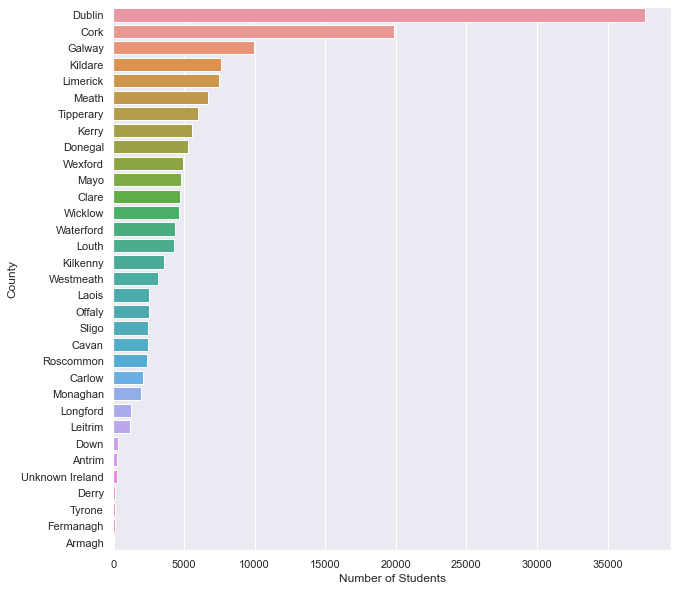

In [25]:
sns.barplot(data=student_population_county, y="County", x="Number of Students");

In [26]:
student_population_county

,County,Number of Students
9,Dublin,37638
5,Cork,19892
11,Galway,9938
13,Kildare,7629
17,Limerick,7461
21,Meath,6681
26,Tipperary,5994
12,Kerry,5541
7,Donegal,5319
31,Wexford,4904


In [27]:
# Split by NUTS3 region 
SE_counties=["Carlow", "Kilkenny", "Waterford", "Wexford"] 
SW_counties = ["Kerry", "Cork"] 
MW_counties = ["Limerick", "Clare", "Tipperary"] 
Border_counties = ["Cavan", "Donegal", "Leitrim", "Monaghan", "Sligo"]
W_counties=["Mayo", "Roscommon", "Galway"]
ME_counties=["Kildare", "Meath", "Wicklow", "Louth"]
Mid_counties=["Laois", "Longford", "Offaly", "Westmeath"]


In [28]:
MW_counties_population = student_population_county [student_population_county ["County"].isin(MW_counties)]
SW_counties_population = student_population_county [student_population_county ["County"].isin(SW_counties)]
SE_counties_population = student_population_county [student_population_county ["County"].isin(SE_counties)]
Border_counties_population=student_population_county [student_population_county ["County"].isin(Border_counties)]
W_counties_population=student_population_county [student_population_county ["County"].isin(W_counties)]
ME_counties_population=student_population_county [student_population_county ["County"].isin(ME_counties)]
Mid_counties_population=student_population_county [student_population_county ["County"].isin(Mid_counties)]
Dublin_population=student_population_county[student_population_county ["County"] == "Dublin"]

In [29]:
MW_counties_tot=MW_counties_population ["Number of Students"].sum()
SW_counties_tot=SW_counties_population ["Number of Students"].sum()
SE_counties_tot=SE_counties_population ["Number of Students"].sum()
Border_counties_tot=Border_counties_population ["Number of Students"].sum()
MW_counties_tot=MW_counties_population ["Number of Students"].sum()
W_counties_tot=W_counties_population ["Number of Students"].sum()
ME_counties_tot=ME_counties_population ["Number of Students"].sum()
Mid_counties_tot=Mid_counties_population ["Number of Students"].sum()
Dub_tot=Dublin_population["Number of Students"].sum()

In [30]:
regional_tots=[
        ["Mid-West",MW_counties_tot],
        ["South West", SW_counties_tot],
        ["South East", SE_counties_tot],
        ["Mid East", ME_counties_tot],
        ["West", W_counties_tot],
        ["Midlands", Mid_counties_tot],
        ["Border", Border_counties_tot],
        ["Dublin", Dub_tot]
]

In [100]:
regional_tots = pd.DataFrame(regional_tots)
regional_tots

,0,1
0,Mid-West,18196
1,South West,25433
2,South East,14907
3,Mid East,23268
4,West,17125
5,Midlands,9480
6,Border,13346
7,Dublin,37638


In [32]:
# Unsurprisingly, the county sending most students to higher college is Dublin, followed by the Cork and Galway. 
# A more meaningful measure of relative participation would be the proportion of the overall population 
# attending higher education. See Section 2 below

### 1.2.1 Import and Clean Data on County Populations 

#### Scrape data 

In [33]:
scraped_data=pd.read_html("https://citypopulation.de/en/ireland/towns/")

In [34]:
print(len(scraped_data))

2


In [35]:
County_Populations=scraped_data[0]

In [36]:
County_Populations.head()

,Name,Status,PopulationCensus1991-04-21,PopulationCensus1996-04-28,PopulationCensus2002-04-28,PopulationCensus2006-04-23,PopulationCensus2011-04-10,PopulationCensus2016-04-24,Unnamed: 8
0,Carlow,County,40942,41616,46014,50349,54612,56932,→
1,Cavan,County,52796,52944,56546,64003,73183,76176,→
2,Clare,County,90918,94006,103277,110950,117196,118817,→
3,Cork,County,...,...,...,...,319494,333213,→
4,Cork City,City,...,...,...,...,199538,209655,→


#### Only include most recent census information (2016)

In [37]:
County_Populations2016=County_Populations.drop(
    ["PopulationCensus1991-04-21", "PopulationCensus1996-04-28", "PopulationCensus2002-04-28", "PopulationCensus2006-04-23", "PopulationCensus2011-04-10", "Unnamed: 8"],
    axis=1)

In [38]:
County_Populations2016

,Name,Status,PopulationCensus2016-04-24
0,Carlow,County,56932
1,Cavan,County,76176
2,Clare,County,118817
3,Cork,County,333213
4,Cork City,City,209655
5,Donegal,County,159192
6,Dublin City,City,554554
7,Dún Laoghaire-Rathdown,County,218018
8,Fingal,County,296020
9,Galway,County,179390


#### Tidy up Dublin, Cork and Galway populations 

In [39]:
def TidyCountyPop(County_Populations2016): 
    if County_Populations2016 ["Name"] in ["Fingal", "Dublin City", "Dún Laoghaire-Rathdown", "South Dublin"]:
        return "Dublin"
    elif County_Populations2016 ["Name"] in ["Cork City"]:
        return "Cork"
    elif County_Populations2016 ["Name"] in ["Galway City"]:
        return "Galway"
    elif County_Populations2016 ["Name"] in ["Laois (Laoighis)"]:
        return "Laois"
    else:
        return County_Populations2016 ["Name"]


In [40]:
County_Populations2016["New Name"]=County_Populations2016.apply (TidyCountyPop, axis=1)
County_Populations2016

,Name,Status,PopulationCensus2016-04-24,New Name
0,Carlow,County,56932,Carlow
1,Cavan,County,76176,Cavan
2,Clare,County,118817,Clare
3,Cork,County,333213,Cork
4,Cork City,City,209655,Cork
5,Donegal,County,159192,Donegal
6,Dublin City,City,554554,Dublin
7,Dún Laoghaire-Rathdown,County,218018,Dublin
8,Fingal,County,296020,Dublin
9,Galway,County,179390,Galway


In [41]:
County_Populations2016 = County_Populations2016.sort_values("New Name")

In [42]:
County_Populations2016

,Name,Status,PopulationCensus2016-04-24,New Name
0,Carlow,County,56932,Carlow
1,Cavan,County,76176,Cavan
2,Clare,County,118817,Clare
3,Cork,County,333213,Cork
4,Cork City,City,209655,Cork
5,Donegal,County,159192,Donegal
6,Dublin City,City,554554,Dublin
7,Dún Laoghaire-Rathdown,County,218018,Dublin
8,Fingal,County,296020,Dublin
25,South Dublin,County,278767,Dublin


In [43]:
County_Populations2016=County_Populations2016.groupby("New Name").sum(["Dublin", "Cork", "Galway"]).reset_index()

In [44]:
# Final Tidy Up
County_Populations2016.columns=["County", "Population_2016"]
County_Populations2016 = County_Populations2016.sort_values("Population_2016", ascending=False)
County_Populations2016 = County_Populations2016.drop(7)

In [45]:
 County_Populations2016# Final table of county populations 2016 in order of size

,County,Population_2016
5,Dublin,1347359
3,Cork,542868
6,Galway,258058
9,Kildare,222504
17,Meath,195044
13,Limerick,194899
22,Tipperary,159553
4,Donegal,159192
25,Wexford,149722
8,Kerry,147707


### Merge County and Student Population Information to get a Patricipation Rate 

In [46]:
merged_population_counties = student_population_county.merge (County_Populations2016, on="County", how="right")

In [47]:
merged_population_counties 

,County,Number of Students,Population_2016
0,Dublin,37638,1347359
1,Cork,19892,542868
2,Galway,9938,258058
3,Kildare,7629,222504
4,Meath,6681,195044
5,Limerick,7461,194899
6,Tipperary,5994,159553
7,Donegal,5319,159192
8,Wexford,4904,149722
9,Kerry,5541,147707


In [48]:
merged_population_counties ["Students Per 1000"] = merged_population_counties ["Number of Students"]/merged_population_counties ["Population_2016"]*1000

In [49]:
merged_population_counties=merged_population_counties.round(decimals=2)

In [50]:
mean_counties=merged_population_counties["Students Per 1000"].mean()

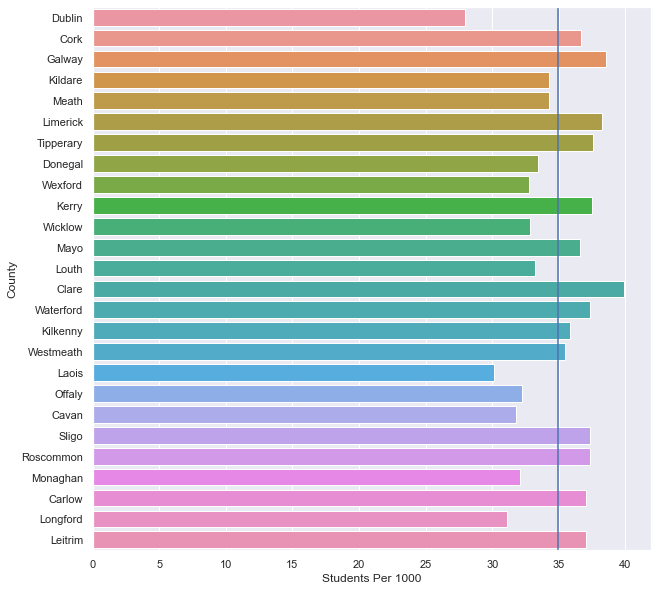

In [51]:
graph=sns.barplot(
    data=merged_population_counties, 
    y="County", 
    x="Students Per 1000",
      );
graph.axvline(mean_counties)
plt.show;

In [52]:
participation_by_county=merged_population_counties.pivot_table(values="Students Per 1000", index="County")
participation_by_county.sort_values("Students Per 1000", ascending=False)

,Students Per 1000
County,
Clare,39.90
Galway,38.51
Limerick,38.28
Tipperary,37.57
Kerry,37.51
Sligo,37.35
Waterford,37.32
Roscommon,37.31
Leitrim,37.07


In [53]:
# These results are somewhat interesting. They show that in Clare, 40 out of every 1000 people are full-time students, 
# while in Dublin it's 28 out of every 100. Not surprising. 

## SECTION 2: 
## WHAT AND WHERE DO STUDENTS FROM THE SOUTH EAST GO TO COLLEGE? 
    

### 2.1 Slice raw material table to generate table only of students from the counties of the South East 

In [54]:
SE_counties_enrolment=raw_material [raw_material["County"].isin(SE_counties)]

In [55]:
SE_counties_enrolment.head()

,Number of Students,Academic Year,Dom Ireland GB,Mode Desc,Isced Discipline,Institute New Combined,County
2359,2,2018/2019,Ireland,Full-time,(0011) Basic programmes and qualifications,Trinity College Dublin,Carlow
2360,1,2018/2019,Ireland,Full-time,(0110) Education not further defined or elsewh...,University of Limerick,Carlow
2361,3,2018/2019,Ireland,Full-time,(0110) Education not further defined or elsewh...,Waterford IT,Carlow
2362,8,2018/2019,Ireland,Full-time,(0111) Education science,Dublin City University,Carlow
2363,9,2018/2019,Ireland,Full-time,(0111) Education science,IT Carlow,Carlow


#### Show a table with the totals for each county in the region and the total enrolment 

In [56]:
SE_overall_enrol = SE_counties_enrolment.groupby ("County") ["Number of Students"].sum() 
SE_overall_enrol.loc["Total"] = SE_overall_enrol.sum()
SE_overall_enrol=SE_overall_enrol.reset_index()
SE_overall_enrol

,County,Number of Students
0,Carlow,2110
1,Kilkenny,3557
2,Waterford,4336
3,Wexford,4904
4,Total,14907


In [57]:
TotalSE=SE_overall_enrol.iloc [4,1]
TotalOverall=student_population_colleges ["Number of Students"].sum()
SE_as_overall_percent=TotalSE/TotalOverall
print(TotalSE)
print(TotalOverall)
print( SE_as_overall_percent.round(decimals=3))

14907
184837
0.081


#### Show a table with the most popular colleges for students from the SE 

In [58]:
SE_popular_colleges=SE_counties_enrolment.groupby ("Institute New Combined") ["Number of Students"].sum()
SE_popular_colleges=SE_popular_colleges.sort_values(ascending=False).reset_index()
# Add column for Rank
SE_popular_colleges["Rank"] = (np.arange(len (SE_popular_colleges)))+1
SE_popular_colleges=SE_popular_colleges.set_index ("Rank")
# Add column to reflect % of overall total 
SE_popular_colleges ["Percent of Total SE"] = (SE_popular_colleges ["Number of Students"]/SE_popular_colleges ["Number of Students"].sum()).round(decimals=3)*100
SE_popular_colleges

,Institute New Combined,Number of Students,Percent of Total SE
Rank,,,
1,Waterford IT,3836,25.7
2,IT Carlow,1686,11.3
3,University College Dublin,1606,10.8
4,University College Cork,1389,9.3
5,Dublin City University,1150,7.7
6,University of Limerick,1020,6.8
7,Maynooth University,936,6.3
8,Trinity College Dublin,699,4.7
9,Technological University Dublin,552,3.7


#### Show a table with the most popular courses for students from the SE

In [59]:
SE_popular_courses=SE_counties_enrolment.groupby ("Isced Discipline") ["Number of Students"].sum()
SE_popular_courses=SE_popular_courses.sort_values(ascending=False).reset_index()
# Add column for Rank
SE_popular_courses["Rank"] = (np.arange(len (SE_popular_courses)))+1
SE_popular_courses=SE_popular_courses.set_index ("Rank")
SE_popular_courses [0:20]

,Isced Discipline,Number of Students
Rank,,
1,(0413) Management and administration,1106
2,(0210) Arts not further defined or elsewhere c...,842
3,(0410) Business and administration not further...,806
4,(0913) Nursing and midwifery,709
5,(0421) Law,502
6,(0113) Teacher training without subject specia...,500
7,(0610) Information and Communication Technolog...,453
8,(0114) Teacher training with subject specializ...,446
9,(0923) Social work and counselling,439


In [60]:
# 
# How does this compare to the national list of popular courses? 
#

In [61]:
SE_popular_courses ["Popularity"]= (np.arange(len (SE_popular_courses)))+1
student_population_course ["Popularity"] = (np.arange(len (student_population_course)))+1
merged_course_choices=student_population_course.merge(SE_popular_courses, left_on="Course Area (Isced)", right_on="Isced Discipline")

conditions=[
    merged_course_choices["Popularity_x"]==merged_course_choices["Popularity_y"]
    , merged_course_choices["Popularity_x"]>merged_course_choices["Popularity_y"]
    , merged_course_choices["Popularity_x"]<merged_course_choices["Popularity_y"]
]
choices=["Same", "Higher for Region", "Lower for Region"]
merged_course_choices ["Popularity Match"] = np.select(conditions, choices)
merged_course_choices ["National Popularity"]=merged_course_choices ["Popularity_x"]
merged_course_choices ["Regional Popularity"]=merged_course_choices ["Popularity_y"]
merged_course_choices = merged_course_choices[["Course Area (Isced)", "Popularity Match", "National Popularity", "Regional Popularity"]]

In [62]:
merged_course_choices=merged_course_choices.sort_values("Regional Popularity", ascending=True)
#merged_course_choices [0:20].set_index("Course Area (Isced)")

In [63]:
regional_anomalies1=merged_course_choices[merged_course_choices["Popularity Match"].isin(["Higher for Region"])]
regional_anomalies2=merged_course_choices[merged_course_choices["Popularity Match"].isin(["Lower for Region"])]

In [64]:
regional_anomalies1 [0:20]

,Course Area (Isced),Popularity Match,National Popularity,Regional Popularity
4,(0413) Management and administration,Higher for Region,5,1
5,(0421) Law,Higher for Region,6,5
11,(0113) Teacher training without subject specia...,Higher for Region,12,6
10,(0114) Teacher training with subject specializ...,Higher for Region,11,8
12,(0923) Social work and counselling,Higher for Region,13,9
21,(1014) Sports,Higher for Region,22,10
19,(0922) Child care and youth services,Higher for Region,20,11
17,(0511) Biology,Higher for Region,18,13
15,(0915) Therapy and rehabilitation,Higher for Region,16,14
26,(0531) Chemistry,Higher for Region,27,19


In [65]:
regional_anomalies2 [0:20]

,Course Area (Isced),Popularity Match,National Popularity,Regional Popularity
0,(0410) Business and administration not further...,Lower for Region,1,3
2,(0913) Nursing and midwifery,Lower for Region,3,4
7,(0510) Biological and related sciences not fur...,Lower for Region,8,12
8,(0613) Software and applications development a...,Lower for Region,9,15
14,(0732) Building and civil engineering,Lower for Region,15,16
3,(0912) Medicine,Lower for Region,4,17
13,(0211) Audio-visual techniques and media produ...,Lower for Region,14,18
18,(0215) Music and performing arts,Lower for Region,19,20
9,(0710) Engineering and engineering trades not ...,Lower for Region,10,21
20,(0411) Accounting and taxation,Lower for Region,21,22


In [66]:
# We revisit this later when we look at SE students studying in SE 

#### How many students from the SE region study in the SE region 

In [67]:
# Define SE colleges
SE_colleges=["Waterford IT", "IT Carlow"]

In [68]:
# Create two subsets, one of SE students studying in SE, one of SE students not studying in SE 
SE_studying_in_SE=SE_counties_enrolment [SE_counties_enrolment ["Institute New Combined"].isin(SE_colleges)]
SE_not_studying_in_SE=SE_counties_enrolment [~SE_counties_enrolment ["Institute New Combined"].isin(SE_colleges)]
SE_studying_in_SE.head()

,Number of Students,Academic Year,Dom Ireland GB,Mode Desc,Isced Discipline,Institute New Combined,County
2361,3,2018/2019,Ireland,Full-time,(0110) Education not further defined or elsewh...,Waterford IT,Carlow
2363,9,2018/2019,Ireland,Full-time,(0111) Education science,IT Carlow,Carlow
2392,9,2018/2019,Ireland,Full-time,(0210) Arts not further defined or elsewhere c...,Waterford IT,Carlow
2395,68,2018/2019,Ireland,Full-time,(0211) Audio-visual techniques and media produ...,IT Carlow,Carlow
2403,13,2018/2019,Ireland,Full-time,"(0212) Fashion, interior and industrial design",IT Carlow,Carlow


In [69]:
SE_studying_in_SE_tots=SE_studying_in_SE.groupby("Institute New Combined").sum()
SE_studying_in_SE_tots.loc["Total"] = SE_studying_in_SE.sum()
SE_studying_in_SE_tots=SE_studying_in_SE_tots.reset_index()
SE_studying_in_SE_tots

,Institute New Combined,Number of Students
0,IT Carlow,1686
1,Waterford IT,3836
2,Total,5522


#### What courses do students studying in the SE typically take? 

In [70]:
SE_studying_in_SE_courses=SE_studying_in_SE.groupby("Isced Discipline").sum()
SE_studying_in_SE_courses = SE_studying_in_SE_courses.sort_values("Number of Students", ascending=False)
SE_studying_in_SE_courses ["Popularity"]= (np.arange(len (SE_studying_in_SE_courses))+1)
SE_studying_in_SE_courses.reset_index()

,Isced Discipline,Number of Students,Popularity
0,(0413) Management and administration,898,1
1,(0922) Child care and youth services,385,2
2,(1014) Sports,365,3
3,(0923) Social work and counselling,361,4
4,(0913) Nursing and midwifery,275,5
5,(0610) Information and Communication Technolog...,268,6
6,(0421) Law,221,7
7,(0210) Arts not further defined or elsewhere c...,182,8
8,(0732) Building and civil engineering,156,9
9,(0613) Software and applications development a...,149,10


#### How many SE students study outside the SE? 

In [71]:
SE_not_studying_in_SE_tots=SE_not_studying_in_SE.groupby("Institute New Combined").sum()
SE_not_studying_in_SE_tots=SE_not_studying_in_SE_tots.sort_values("Number of Students", ascending=False)
SE_not_studying_in_SE_tots.loc["Total"] = SE_not_studying_in_SE.sum()
SE_not_studying_in_SE_tots["Rank"] = (np.arange(len (SE_not_studying_in_SE_tots)))+1
SE_not_studying_in_SE_tots=SE_not_studying_in_SE_tots.reset_index()
SE_not_studying_in_SE_tots=SE_not_studying_in_SE_tots.set_index ("Rank")
SE_not_studying_in_SE_tots

,Institute New Combined,Number of Students
Rank,,
1,University College Dublin,1606
2,University College Cork,1389
3,Dublin City University,1150
4,University of Limerick,1020
5,Maynooth University,936
6,Trinity College Dublin,699
7,Technological University Dublin,552
8,Cork IT,512
9,"National University of Ireland, Galway",379


In [72]:
# SE Totals
SE_in_tot=SE_studying_in_SE ["Number of Students"].sum()
SE_out_tot=SE_not_studying_in_SE ["Number of Students"].sum()
SE_all_tot=SE_in_tot+SE_out_tot

#### What courses do they typically take? 

In [73]:
SE_not_studying_in_SE_courses=SE_not_studying_in_SE.groupby("Isced Discipline").sum()
SE_not_studying_in_SE_courses = SE_not_studying_in_SE_courses.sort_values("Number of Students", ascending=False)
SE_not_studying_in_SE_courses ["Popularity"]= (np.arange(len (SE_not_studying_in_SE_courses))+1)
SE_not_studying_in_SE_courses=SE_not_studying_in_SE_courses.reset_index()
SE_not_studying_in_SE_courses

,Isced Discipline,Number of Students,Popularity
0,(0410) Business and administration not further...,756,1
1,(0210) Arts not further defined or elsewhere c...,660,2
2,(0113) Teacher training without subject specia...,500,3
3,(0114) Teacher training with subject specializ...,446,4
4,(0913) Nursing and midwifery,434,5
...,...,...,...
83,(0612) Database and network design and adminis...,3,84
84,(0221) Religion and theology,2,85
85,(1031) Military and defence,2,86
86,(0712) Environmental protection technology,1,87


#### Can we learn anything from a comparison of outbound SE students vs retained SE students on course choice? 

In [74]:
merged_SE_course_choices=SE_studying_in_SE_courses.merge(SE_not_studying_in_SE_courses, on="Isced Discipline", how="outer")

In [75]:
merged_SE_course_choices

,Isced Discipline,Number of Students_x,Popularity_x,Number of Students_y,Popularity_y
0,(0413) Management and administration,898.0,1.0,208.0,13.0
1,(0922) Child care and youth services,385.0,2.0,27.0,65.0
2,(1014) Sports,365.0,3.0,63.0,47.0
3,(0923) Social work and counselling,361.0,4.0,78.0,40.0
4,(0913) Nursing and midwifery,275.0,5.0,434.0,5.0
...,...,...,...,...,...
85,"(0322) Library, information and archival studies",NaN,NaN,5.0,80.0
86,(0214) Handicrafts,NaN,NaN,4.0,81.0
87,(0021) Literacy and numeracy,NaN,NaN,3.0,83.0
88,(0712) Environmental protection technology,NaN,NaN,1.0,87.0


In [76]:
merged_SE_course_choices

,Isced Discipline,Number of Students_x,Popularity_x,Number of Students_y,Popularity_y
0,(0413) Management and administration,898.0,1.0,208.0,13.0
1,(0922) Child care and youth services,385.0,2.0,27.0,65.0
2,(1014) Sports,365.0,3.0,63.0,47.0
3,(0923) Social work and counselling,361.0,4.0,78.0,40.0
4,(0913) Nursing and midwifery,275.0,5.0,434.0,5.0
...,...,...,...,...,...
85,"(0322) Library, information and archival studies",NaN,NaN,5.0,80.0
86,(0214) Handicrafts,NaN,NaN,4.0,81.0
87,(0021) Literacy and numeracy,NaN,NaN,3.0,83.0
88,(0712) Environmental protection technology,NaN,NaN,1.0,87.0


In [77]:
# Determine course areas where no SE students study in the SE but where they do courses elsewhere
# and quantify 

In [78]:
SE_outbound_exclusive=merged_SE_course_choices[merged_SE_course_choices["Popularity_x"].isnull()]
SE_outbound_exclusive=SE_outbound_exclusive.sort_values("Number of Students_y", ascending=False)
SE_outbound_exclusive = SE_outbound_exclusive [["Isced Discipline", "Number of Students_y"]]
SE_outbound_exclusive=SE_outbound_exclusive.set_index("Isced Discipline")
SE_outbound_exclusive["Number of Students_y"].sum()
SE_outbound_exclusive["Number of Students_y"] = SE_outbound_exclusive["Number of Students_y"].astype(int)
SE_outbound_exclusive = SE_outbound_exclusive.reset_index()

In [79]:
SE_outbound_exclusive # These are course areas for which no students from SE study in the SE
# wiht a total student outward migration of 2960 to take these courses 

,Isced Discipline,Number of Students_y
0,(0113) Teacher training without subject specia...,500
1,(0114) Teacher training with subject specializ...,446
2,(0912) Medicine,270
3,(0288) Interdisciplinary programmes and qualif...,221
4,(0231) Language acquisition,148
5,(0310) Social and behavioural sciences not fur...,128
6,(0588) Interdisciplinary programmes and qualif...,124
7,(0530) Physical sciences not further defined o...,91
8,(0232) Literature and linguistics,89
9,(0841) Veterinary,83


In [80]:
# Then there are courses where some SE students study in the SE but where many more study outside

In [81]:
conditions=[
    merged_SE_course_choices["Popularity_x"]==merged_SE_course_choices["Popularity_y"]
    , merged_SE_course_choices["Popularity_x"]>merged_SE_course_choices["Popularity_y"]
    , merged_SE_course_choices["Popularity_x"]<merged_SE_course_choices["Popularity_y"]
]
choices=["Same", "Less Popular", "More Popular"]
merged_SE_course_choices ["Popularity Match"] = np.select(conditions, choices)
merged_SE_course_choices ["Popularity with Retained Students"]=merged_SE_course_choices ["Popularity_x"]
merged_SE_course_choices ["Popularity with Outbound Students"]=merged_SE_course_choices ["Popularity_y"]
merged_SE_course_choices = merged_SE_course_choices[["Isced Discipline", "Popularity Match", "Popularity with Retained Students", "Popularity with Outbound Students"]]

In [82]:
merged_SE_course_choices

,Isced Discipline,Popularity Match,Popularity with Retained Students,Popularity with Outbound Students
0,(0413) Management and administration,More Popular,1.0,13.0
1,(0922) Child care and youth services,More Popular,2.0,65.0
2,(1014) Sports,More Popular,3.0,47.0
3,(0923) Social work and counselling,More Popular,4.0,40.0
4,(0913) Nursing and midwifery,Same,5.0,5.0
...,...,...,...,...
85,"(0322) Library, information and archival studies",0,NaN,80.0
86,(0214) Handicrafts,0,NaN,81.0
87,(0021) Literacy and numeracy,0,NaN,83.0
88,(0712) Environmental protection technology,0,NaN,87.0


In [83]:
SE_outbound_preferences=merged_SE_course_choices[merged_SE_course_choices["Popularity Match"].isin(["Less Popular"])]

In [84]:
SE_outbound_preferences = SE_outbound_preferences.sort_values("Popularity with Outbound Students", ascending=True)
SE_outbound_preferences = SE_outbound_preferences.astype({"Popularity with Retained Students":"int","Popularity with Outbound Students":"int"})

In [85]:
SE_outbound_preferences [0:20]

,Isced Discipline,Popularity Match,Popularity with Retained Students,Popularity with Outbound Students
27,(0410) Business and administration not further...,Less Popular,28,1
7,(0210) Arts not further defined or elsewhere c...,Less Popular,8,2
6,(0421) Law,Less Popular,7,6
13,(0510) Biological and related sciences not fur...,Less Popular,14,8
25,(0511) Biology,Less Popular,26,9
22,(0915) Therapy and rehabilitation,Less Popular,23,11
32,(0710) Engineering and engineering trades not ...,Less Popular,33,12
29,(0215) Music and performing arts,Less Popular,30,14
41,(0220) Humanities (except languages) not furth...,Less Popular,42,16
50,(0914) Medical diagnostic and treatment techno...,Less Popular,51,22


#### Create Some Comparators: the South West, and the Mid West

In [86]:
# The South West 
SW_counties_enrolment = raw_material [raw_material["County"].isin(SW_counties)]

In [87]:
SW_overall_enrol = SW_counties_enrolment.groupby ("County") ["Number of Students"].sum() 
SW_overall_enrol.loc["Total"] = SW_overall_enrol.sum()
SW_overall_enrol=SW_overall_enrol.reset_index()

In [88]:
SW_colleges=["University College Cork", "Cork IT", "IT Tralee"]
SW_studying_in_SW=SW_counties_enrolment [SW_counties_enrolment ["Institute New Combined"].isin(SW_colleges)]
SW_not_studying_in_SW=SW_counties_enrolment [~SW_counties_enrolment ["Institute New Combined"].isin(SW_colleges)]

In [89]:
SW_in_tot=SW_studying_in_SW ["Number of Students"].sum()
SW_out_tot=SW_not_studying_in_SW ["Number of Students"].sum()
SW_all_tot=SW_in_tot+SW_out_tot

In [90]:
# The Mid West
MW_counties_enrolment = raw_material [raw_material["County"].isin(MW_counties)]

In [91]:
MW_overall_enrol = MW_counties_enrolment.groupby ("County") ["Number of Students"].sum() 
MW_overall_enrol.loc["Total"] = MW_overall_enrol.sum()
MW_overall_enrol=MW_overall_enrol.reset_index()

In [92]:
MW_colleges=["University of Limerick", "Limerick IT", "Athlone IT"]
MW_studying_in_MW=MW_counties_enrolment [MW_counties_enrolment ["Institute New Combined"].isin(MW_colleges)]
MW_not_studying_in_MW=MW_counties_enrolment [~MW_counties_enrolment ["Institute New Combined"].isin(MW_colleges)]

In [93]:
MW_in_tot=MW_studying_in_MW ["Number of Students"].sum()
MW_out_tot=MW_not_studying_in_MW ["Number of Students"].sum()
MW_all_tot=MW_in_tot+MW_out_tot

In [94]:
# Regional Comparisons

In [95]:
regional_comparisons = {"Region": ["South East", "South West", "Mid-West"],
                        "Total Students From Region": [SE_all_tot, SW_all_tot, MW_all_tot],
                        "Total Studying in Region": [SE_in_tot,SW_in_tot, MW_in_tot],
                        "Total Studying Outside Region": [SE_out_tot, SW_out_tot, MW_out_tot]   
}

In [96]:
regional_comparisons=pd.DataFrame(regional_comparisons)

In [97]:
regional_comparisons ["Percentage In"]=regional_comparisons ["Total Studying in Region"]/ regional_comparisons ["Total Students From Region"]
regional_comparisons ["Percentage Out"]=regional_comparisons ["Total Studying Outside Region"]/ regional_comparisons["Total Students From Region"]

In [98]:
regional_comparisons

,Region,Total Students From Region,Total Studying in Region,Total Studying Outside Region,Percentage In,Percentage Out
0,South East,14907,5522,9385,0.370430,0.629570
1,South West,25433,18775,6658,0.738214,0.261786
2,Mid-West,18196,9027,9169,0.496098,0.503902


#### Add in percentage of overall national enrolment 

In [99]:
MW_counties_population = student_population_county [student_population_county ["County"].isin(MW_counties)]
SW_counties_population = student_population_county [student_population_county ["County"].isin(SW_counties)]
SE_counties_population = student_population_county [student_population_county ["County"].isin(SE_counties)]
